In [1]:
##import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
const = "C:/Users/deshp/Desktop/Advait/"

In [3]:
##loading data from CSV
data=pd.read_csv("SalesData.csv")
data.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527802 entries, 0 to 527801
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527802 non-null  int64  
 1   StockCode    527802 non-null  object 
 2   Description  527802 non-null  object 
 3   Quantity     527802 non-null  int64  
 4   InvoiceDate  527802 non-null  object 
 5   UnitPrice    527802 non-null  float64
 6   CustomerID   527802 non-null  int64  
 7   Country      527802 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 32.2+ MB


In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,United Kingdom


In [6]:
# preprocessing
cols = data.select_dtypes(object).columns
data[cols] = data[cols].apply(lambda x: x.str.strip())
data[['StockCode','Description','Country']]=data[
    ['StockCode','Description','Country']].apply(lambda x : x.str.strip())
data[['StockCode','Description','Country']]=data[
    ['StockCode','Description','Country']].apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
data.isnull().sum().sum()

0

In [7]:
# basics stats about the data
stats = {
    'Stats':['StockCode','InvoiceNo','Description','InvoiceDate','CustomerID','Country','Quantity','UnitPrice'],
    'Count':[
             len(data.groupby('StockCode')),
             len(data.groupby('InvoiceNo')),
             len(data.groupby('Description')),
             len(data.groupby('InvoiceDate')),
             len(data.groupby('CustomerID')),
             len(data.groupby('Country')),
             len(data.groupby('Quantity')),
             len(data.groupby('UnitPrice'))

    ]
}
stats = pd.DataFrame(data=stats)
stats

,Stats,Count
0,StockCode,3805
1,InvoiceNo,19786
2,Description,4008
3,InvoiceDate,18344
4,CustomerID,4681
5,Country,38
6,Quantity,374
7,UnitPrice,502


In [8]:
# adding columns according to the analysis requirement
data[['Date','Time']] = data['InvoiceDate'].str.split(' ',expand=True)
data["Date"]=pd.to_datetime(data["Date"],format="%d/%m/%Y") 
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data['Week'] = data['Date'].dt.week
data['Total'] = data.Quantity * data.UnitPrice

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Month,Day,Year,Week,Total
0,536365,85123a,white hanging heart t-light holder,6,1/12/2010 8:26,2.55,17850,united kingdom,2010-12-01,8:26,12,1,2010,48,15.30
1,536365,71053,white metal lantern,6,1/12/2010 8:26,3.39,17850,united kingdom,2010-12-01,8:26,12,1,2010,48,20.34
2,536365,84406b,cream cupid hearts coat hanger,8,1/12/2010 8:26,2.75,17850,united kingdom,2010-12-01,8:26,12,1,2010,48,22.00
3,536365,84029g,knitted union flag hot water bottle,6,1/12/2010 8:26,3.39,17850,united kingdom,2010-12-01,8:26,12,1,2010,48,20.34
4,536365,84029e,red woolly hottie white heart.,6,1/12/2010 8:26,3.39,17850,united kingdom,2010-12-01,8:26,12,1,2010,48,20.34


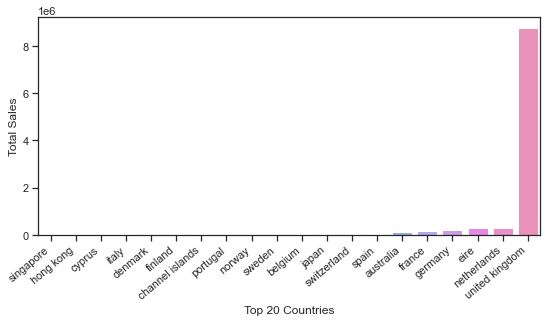

In [13]:
###find total country wise sales.
countrywise_sales = data.groupby(['Country']).agg({'Total':sum}).reset_index()
countrywise_sales.sort_values(by=['Total'], inplace=True)
plt.figure(figsize=(9,4))
df= countrywise_sales.tail(5)
ax = sns.barplot(x="Country", y='Total', data=countrywise_sales.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Countries', ylabel='Total Sales')
plt.show()


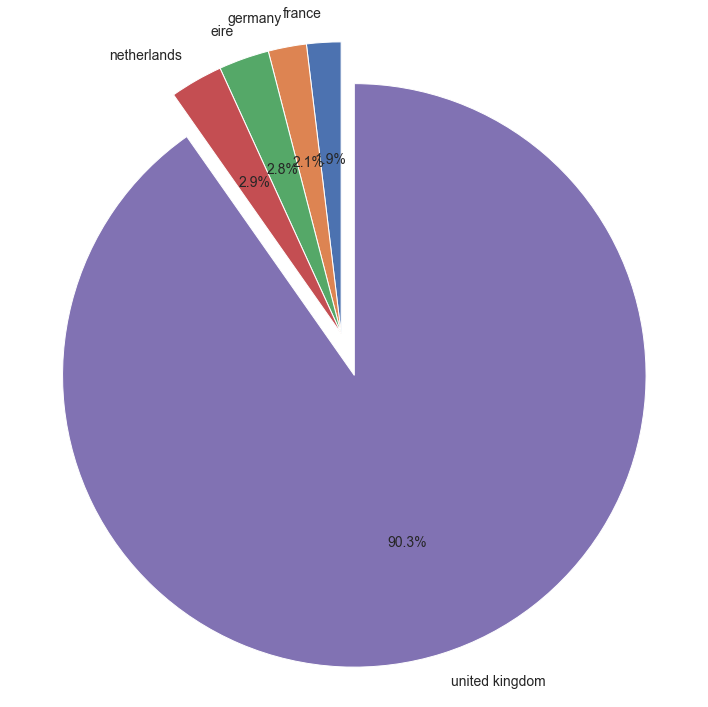

In [14]:
# pie chart of total country wise sales

plt.figure(figsize=(10,10))
plt.pie(
    # using data total)arrests
    df['Total'],
    # with the labels being officer names
    labels=df['Country'],
    # with no shadows
    shadow=False,
    # with colors
#     colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%', textprops={'fontsize': 14}
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [15]:
# United Kingdom data
data_uk = data[data['Country'] == "united kingdom"]
data_uk['MonthName'] = data_uk['Date'].dt.month_name() 

<ipython-input-15-68f5c949cb51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uk['MonthName'] = data_uk['Date'].dt.month_name()


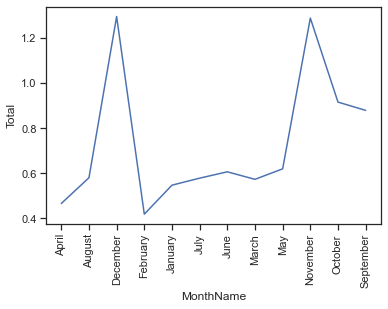

In [16]:
# monthwise sale in UK
monthwise = data_uk.groupby(['MonthName']).agg({'Total':sum}).reset_index()
monthwise['Total'] = np.round(monthwise['Total'],2)
monthwise.Total = monthwise.Total/1000000
plt.xticks(rotation=90)
sns.lineplot(data=monthwise, x="MonthName", y="Total")
# monthwise.to_json(const+'month.json',orient='records')

In [17]:
###unique customers per month in UK
unique_customers = data_uk.groupby(['MonthName']).agg({'CustomerID':pd.Series.nunique,'Month':'unique'}).reset_index()
# unique_customers.to_json(const+'unique_customers.json',orient='records')

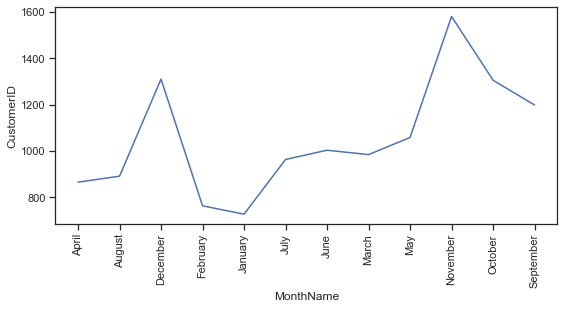

In [18]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=90)
sns.lineplot(data=unique_customers, x="MonthName", y="CustomerID")

In [19]:
###number of unique customers per week
unique_customers_weekly = data_uk.groupby(['Week']).agg({'CustomerID':pd.Series.nunique}).reset_index()
unique_customers_weekly.head()

,Week,CustomerID
0,1,206
1,2,207
2,3,189
3,4,237
4,5,240


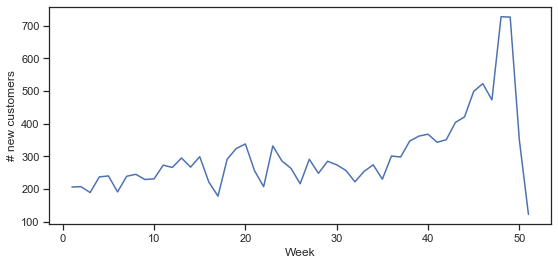

In [20]:
plt.figure(figsize=(9,4))
plt.ylabel("# of new customers")
ax = sns.lineplot(data=unique_customers_weekly, x="Week", y="CustomerID")
ax.set(xlabel='Week', ylabel='# new customers')
plt.show()

In [21]:
##average purchase value by day

average_purchase_value_day = data_uk.groupby(['Day']).agg({'Total':'mean'}).reset_index()
average_purchase_value_day

,Day,Total
0,1,16.943959
1,2,17.973425
2,3,20.883628
3,4,18.727134
4,5,16.560521
5,6,15.693281
6,7,22.877105
7,8,15.299453
8,9,28.115557
9,10,18.670606


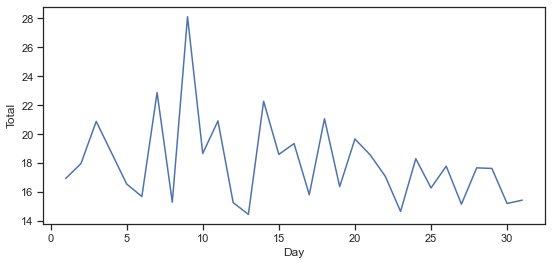

In [22]:
plt.figure(figsize=(9,4))
sns.lineplot(data=average_purchase_value_day, x="Day", y="Total")

In [23]:
##average purchase value by month
average_purchase_value = data_uk.groupby(['Month']).agg({'Total':sum}).reset_index()
average_purchase_value.Total = average_purchase_value.Total/1000000

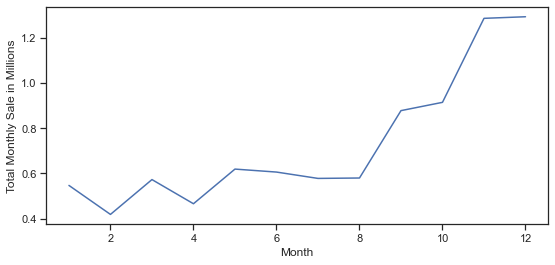

In [24]:
plt.figure(figsize=(9,4))
ax = sns.lineplot(data=average_purchase_value, x="Month", y="Total")
ax.set(xlabel='Month', ylabel='Total Monthly Sale in Millions')
plt.show()

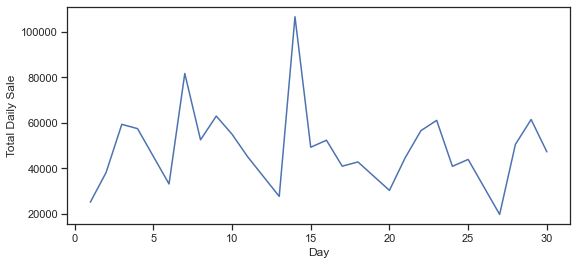

In [27]:
##months 11 to check the daily sale
sales_nov = data_uk[(data_uk['Month'] == 11)]
gross = sales_nov.groupby(['Day']).agg({'Total':sum}).reset_index()
plt.figure(figsize=(9,4))
ax = sns.lineplot(data=gross, x="Day", y="Total")
ax.set(xlabel='Day', ylabel='Total Daily Sale')
plt.show()



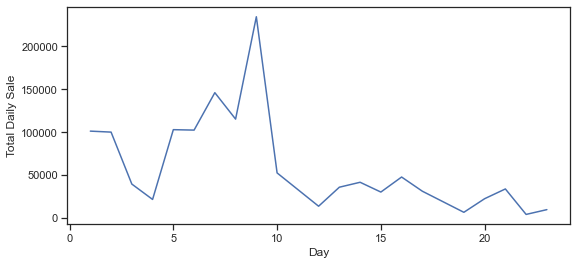

In [28]:
##months 12, during which days are sell more.
sales_dec = data_uk[(data_uk['Month'] == 12)]
sales_dec.head()
gross = sales_dec.groupby(['Day']).agg({'Total':sum}).reset_index()
plt.figure(figsize=(9,4))
ax = sns.lineplot(data=gross, x="Day", y="Total")
ax.set(xlabel='Day', ylabel='Total Daily Sale')
plt.show()
# gross.to_json(const+'dec_sales.json',orient='records')

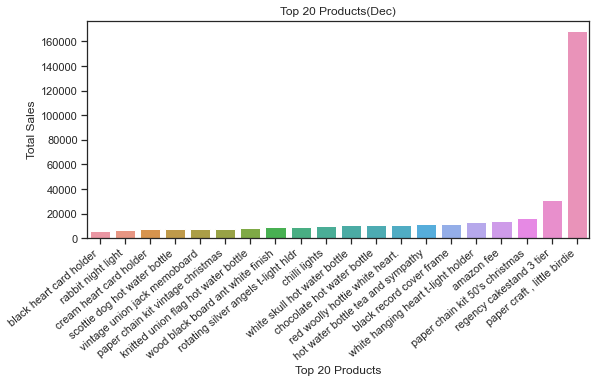

In [30]:
# products sale in december
df11=sales_dec.groupby(['Description']).agg({'Total':sum}).reset_index()
df11.sort_values(['Total'], inplace=True)

plt.figure(figsize=(9,4))
ax = sns.barplot(x="Description", y='Total', data=df11.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Products', ylabel='Total Sales' ,title="Top 20 Products(Dec)")
plt.show()

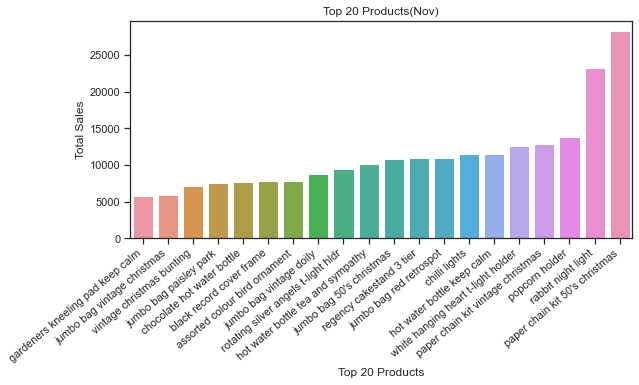

In [32]:
# product sale in November
df12 = sales_nov.groupby(['Description']).agg({'Total':sum}).reset_index()
df12.sort_values(['Total'], inplace=True)
df22 = df12.tail(20)
df22 = df22.round(2)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Description", y='Total', data=df12.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Products', ylabel='Total Sales',title="Top 20 Products(Nov)")
plt.show()


# df22.to_json(const+'novProd.json',orient="records")

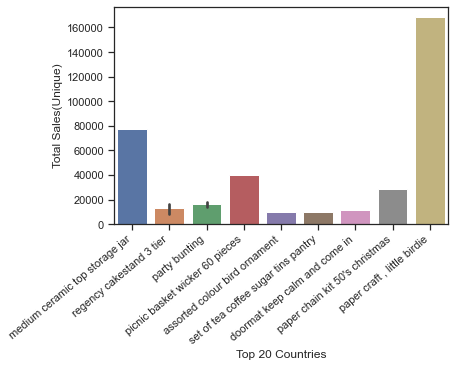

In [35]:
##top product by Quantity in each month
results = pd.DataFrame()
df10 = data_uk.groupby(['Description','Month']).agg({'Total':sum}).reset_index()
for month in range(1, 13):
    results = results.append(pd.DataFrame(df10[df10.Total==max(df10[df10['Month'] == month].Total)]))
results.sort_values(['Total'])
ax = sns.barplot(x="Description", y='Total', data=results.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Countries', ylabel='Total Sales(Unique)')
plt.show()

In [36]:
##most sold product over the world
df12 = data.groupby(['Description']).agg({'Quantity':sum}).reset_index()

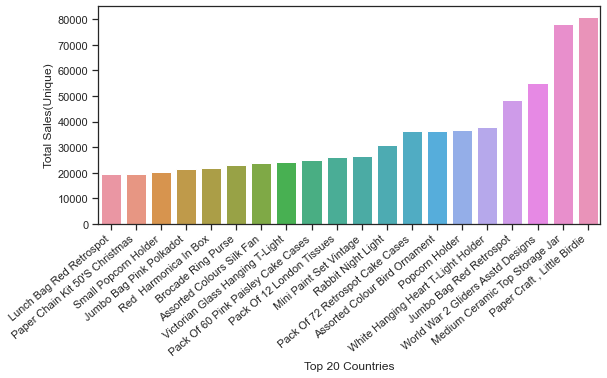

In [37]:
df12.sort_values(['Quantity'], inplace=True)
df12['Description'] = df12['Description'].str.title()
df = df12.tail(20)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Description", y='Quantity', data=df12.tail(20));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Countries', ylabel='Total Sales(Unique)')
plt.show()
# d.to_json('C:/Users/deshp/Desktop/Advait/products.json',orient='records')

In [38]:
# outlier data point
birdie = data_uk[data_uk['Description']=='paper craft , little birdie']
birdie

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Month,Day,Year,Week,Total,MonthName
526328,581483,23843,"paper craft , little birdie",80995,9/12/2011 9:15,2.08,16446,united kingdom,2011-12-09,9:15,12,9,2011,49,168469.6,December


In [39]:
data_uk[data_uk['CustomerID'] == 16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Month,Day,Year,Week,Total,MonthName
188755,553573,22980,pantry scrubbing brush,1,18/05/2011 9:52,1.65,16446,united kingdom,2011-05-18,9:52,5,18,2011,20,1.65,May
188756,553573,22982,pantry pastry brush,1,18/05/2011 9:52,1.25,16446,united kingdom,2011-05-18,9:52,5,18,2011,20,1.25,May
526328,581483,23843,"paper craft , little birdie",80995,9/12/2011 9:15,2.08,16446,united kingdom,2011-12-09,9:15,12,9,2011,49,168469.60,December
